In [57]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
df = pd.read_csv('winemag-data-small.csv',index_col=0)

In [9]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1.0,US,This tightly wound wine offers firm purple fru...,Marsh Estate Vineyard,90,50.0,Oregon,Willamette Valley,NaN,Paul Gregutt,@paulgwine,Roco 2015 Marsh Estate Vineyard Pinot Noir,Pinot Noir,Roco
2.0,France,The wine is initially soft and then begins to ...,Lieu-dit Les Epinats,87,NaN,Loire Valley,Saumur,NaN,Roger Voss,@vossroger,Cave de Saumur 2013 Lieu-dit Les Epinats (Sau...,Chenin Blanc,Cave de Saumur
3.0,US,"A rare find, this is a delightfully fun wine, ...",Noir de Noirs Old Vines,88,30.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Wellington 2013 Noir de Noirs Old Vines Alican...,Alicante Bouschet,Wellington
4.0,Italy,"This sweet, Moscato-based offering would pair ...",Lounge,84,13.0,Veneto,Veneto,NaN,NaN,NaN,Astoria NV Lounge Moscato (Veneto),Moscato,Astoria
5.0,US,Full bodied and stuffed with fresh fruit flavo...,Honest,88,18.0,California,California,California Other,Jim Gordon,@gordone_cellars,The Federalist 2014 Honest Red (California),Red Blend,The Federalist


In [12]:
df.isnull().sum()

country                     1
description                 0
designation              2901
points                      0
price                     722
province                    1
region_1                 1592
region_2                 6037
taster_name              2050
taster_twitter_handle    2419
title                       0
variety                     0
winery                      0
dtype: int64

In [16]:
grp = df.groupby('country')[['points','price']].mean().sort_values(by='points',ascending=False)

<AxesSubplot: xlabel='country'>

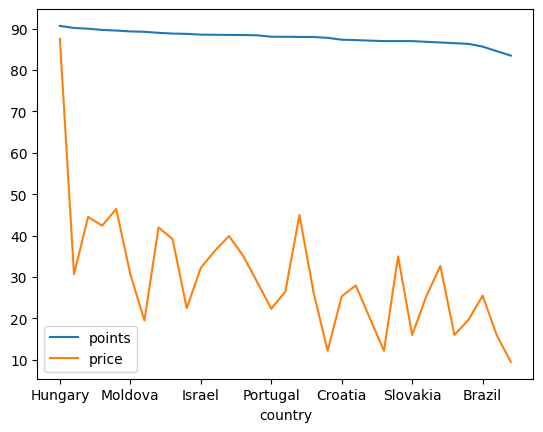

In [22]:
grp.plot()

In [21]:
df.corr(numeric_only=True)

,points,price
points,1.000000,0.442337
price,0.442337,1.000000


In [25]:
txt = df.description[1]

(-0.5, 399.5, 199.5, -0.5)

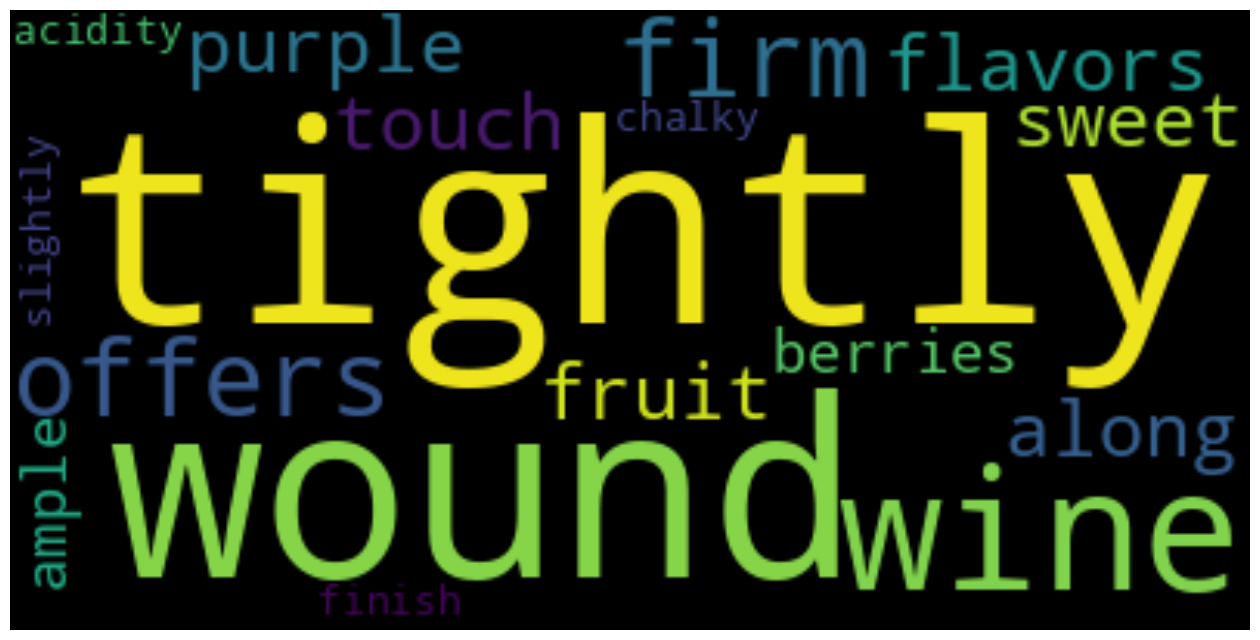

In [30]:
wrdcld = WordCloud().generate(txt)
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

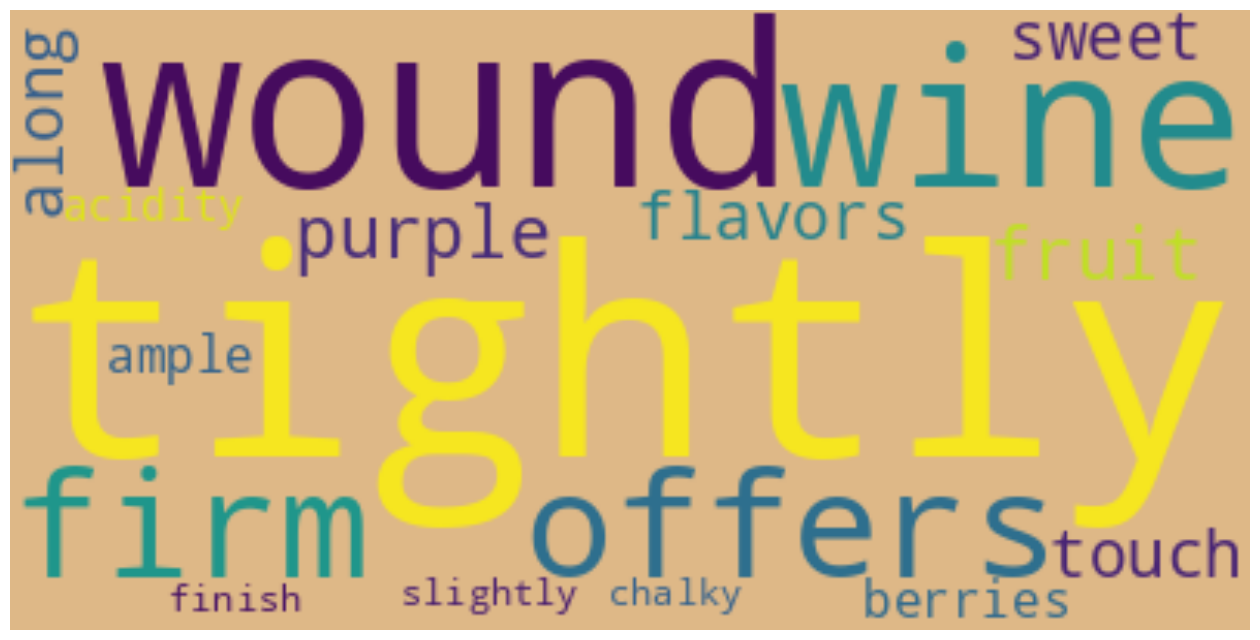

In [38]:
wrdcld = WordCloud(max_font_size=100,max_words=100,background_color='burlywood').generate(txt)
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='bilinear')
plt.axis('off')

In [49]:
txt = ' '.join(df.description)

In [47]:
txt = ' '.join(i for i in df.description)

In [50]:
len(txt)

2437720

In [53]:
sw = set(STOPWORDS)
sw.update(['drink','now','wine','flavour','flavours','flavor','flavors'])

In [54]:
wrdcld = WordCloud(mode='RGBA',width=400,height=200,max_font_size=100,stopwords=sw,max_words=50,background_color=None).generate(txt)

(-0.5, 399.5, 199.5, -0.5)

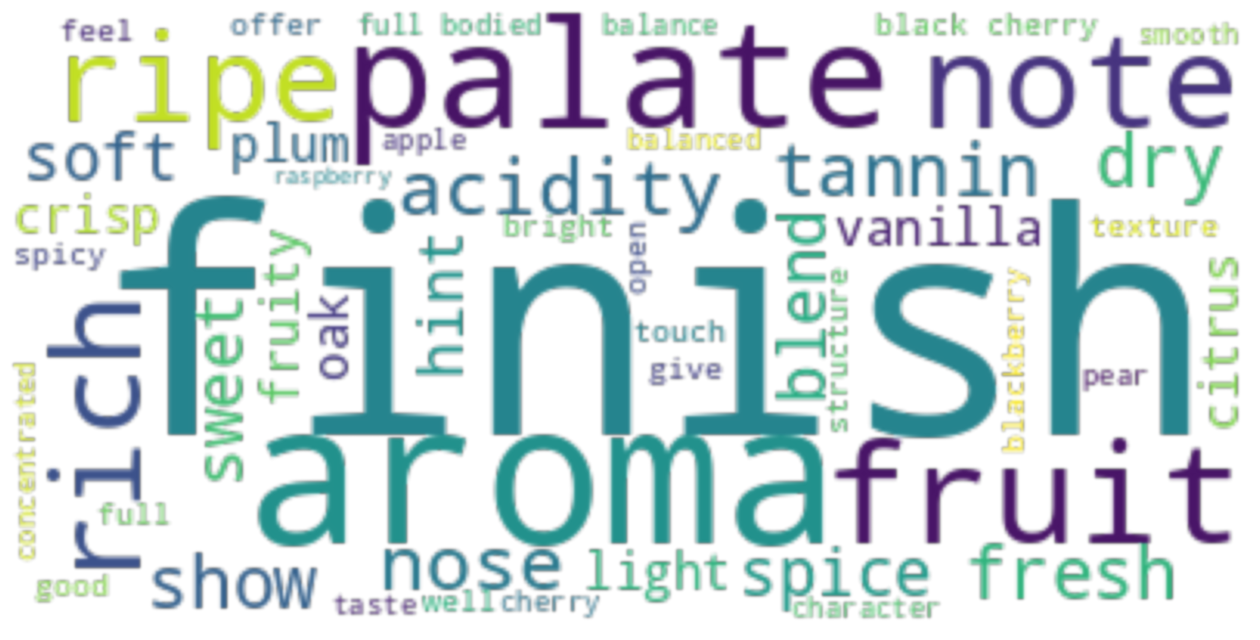

In [55]:
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='gaussian')
plt.axis('off')

In [58]:
wine_msk = np.array(Image.open('wine-bottle-png.png'))

In [59]:
wine_msk

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
def trnsfm(pxl):
    if pxl == 0: return 255
    else: return pxl

In [61]:
trnsfmd_wine_msk = np.ndarray((wine_msk.shape[0],wine_msk.shape[1]),np.int32)

In [62]:
for i in range(len(wine_msk)):
    trnsfmd_wine_msk[i] = list(map(trnsfm,wine_msk[i]))

In [63]:
trnsfmd_wine_msk

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

(-0.5, 224.5, 224.5, -0.5)

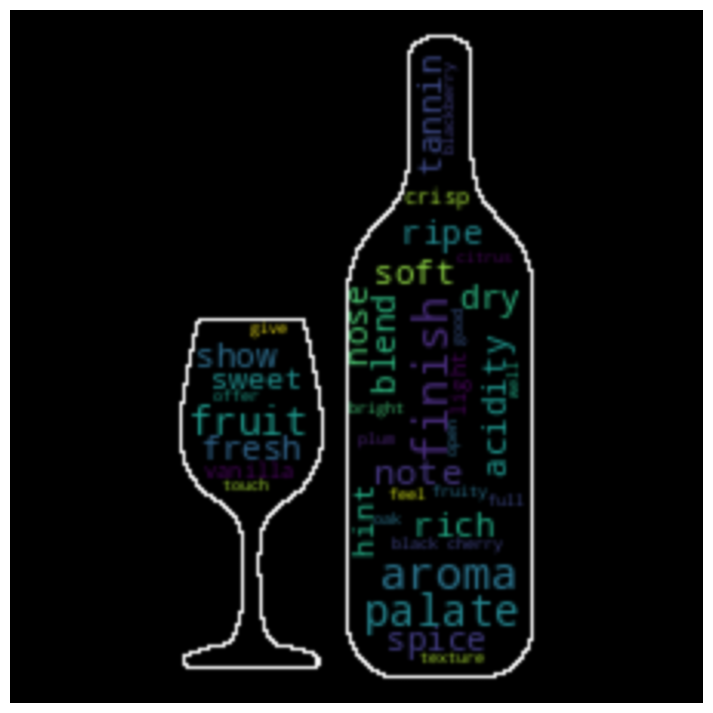

In [69]:
wrdcld = WordCloud(background_color='black',max_words=100,mask=trnsfmd_wine_msk,stopwords=sw,contour_width=1,contour_color='white').generate(txt)
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='gaussian')
plt.axis('off')

(-0.5, 224.5, 224.5, -0.5)

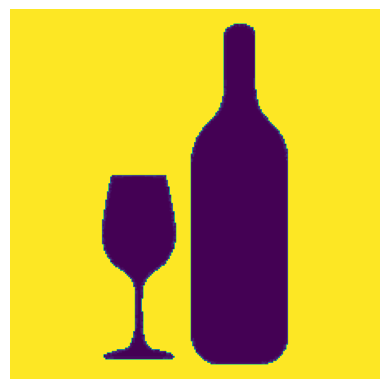

In [65]:
plt.imshow(trnsfmd_wine_msk)
plt.axis('off')